In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [108]:
df = pd.read_csv("used_cars_data.csv")
df.head()
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [75]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [77]:
df.shape

(7253, 14)

<Axes: >

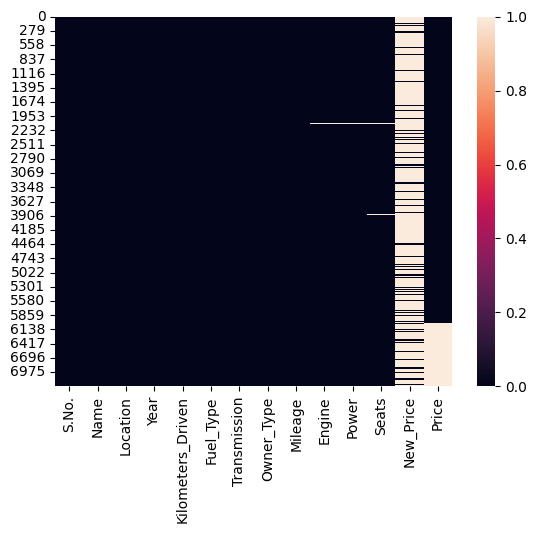

In [78]:
sns.heatmap(df.isnull())

In [79]:
#removeing rows contain null values
df.dropna(subset = ["Engine","Power", "Seats"], inplace= True)


In [80]:
#defining mean for missing vaules in Price column
Price_mean = df["Price"].mean()
print(Price_mean)
df["Price"] = df["Price"].fillna(Price_mean)

9.502775639953155


In [81]:
#deleting the New Price columns since it have lots of null values
df.drop(["New_Price"], axis = 1, inplace= True)

<Axes: >

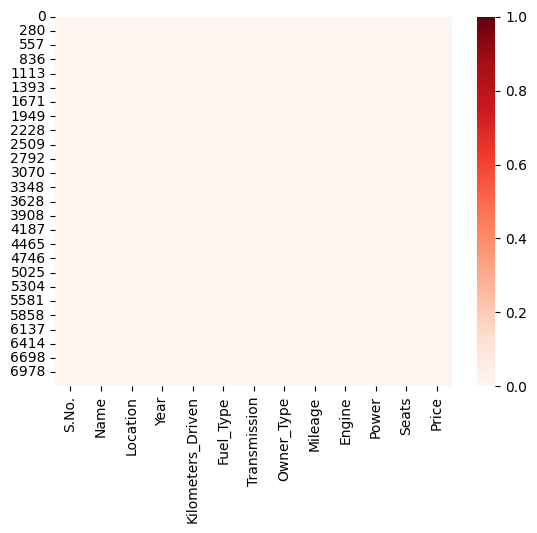

In [82]:
sns.heatmap(df.isnull(), cmap = "Reds")

In [83]:
#checking for duplicates
df.duplicated().sum().sum()

np.int64(0)

In [84]:
df.Year.dtype

dtype('int64')

In [85]:
# Data Type Convertion
df["Year"] = pd.to_datetime(df["Year"]).dt.year

In [86]:
# Name of columns
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [87]:
#feature engineering 
df['Price_per_KM'] = df['Price'] / df['Kilometers_Driven']

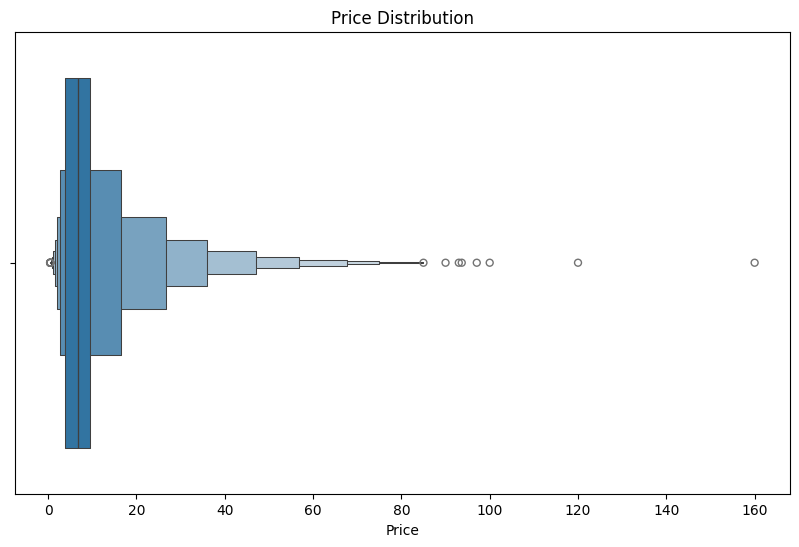

In [88]:
# Univariate
plt.figure(figsize = (10,6))
sns.boxenplot(x = df["Price"])
plt.title("Price Distribution")
plt.show()

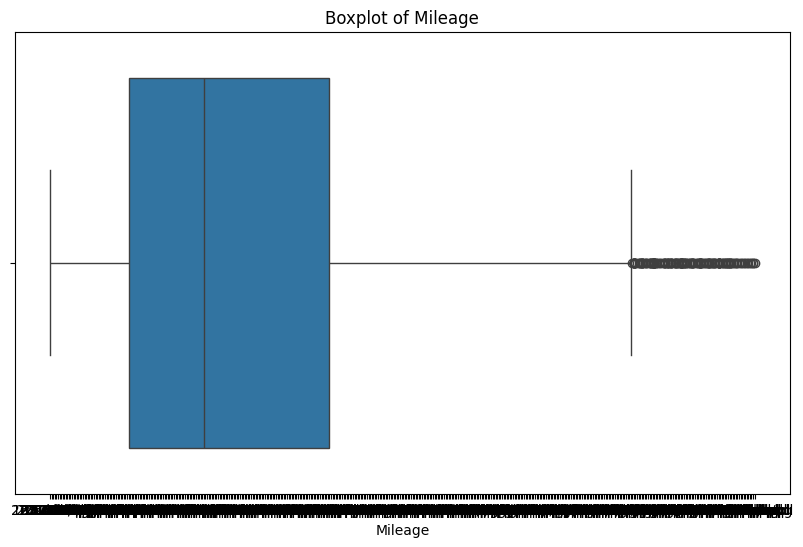

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mileage', data=df)
plt.title('Boxplot of Mileage')
plt.show()

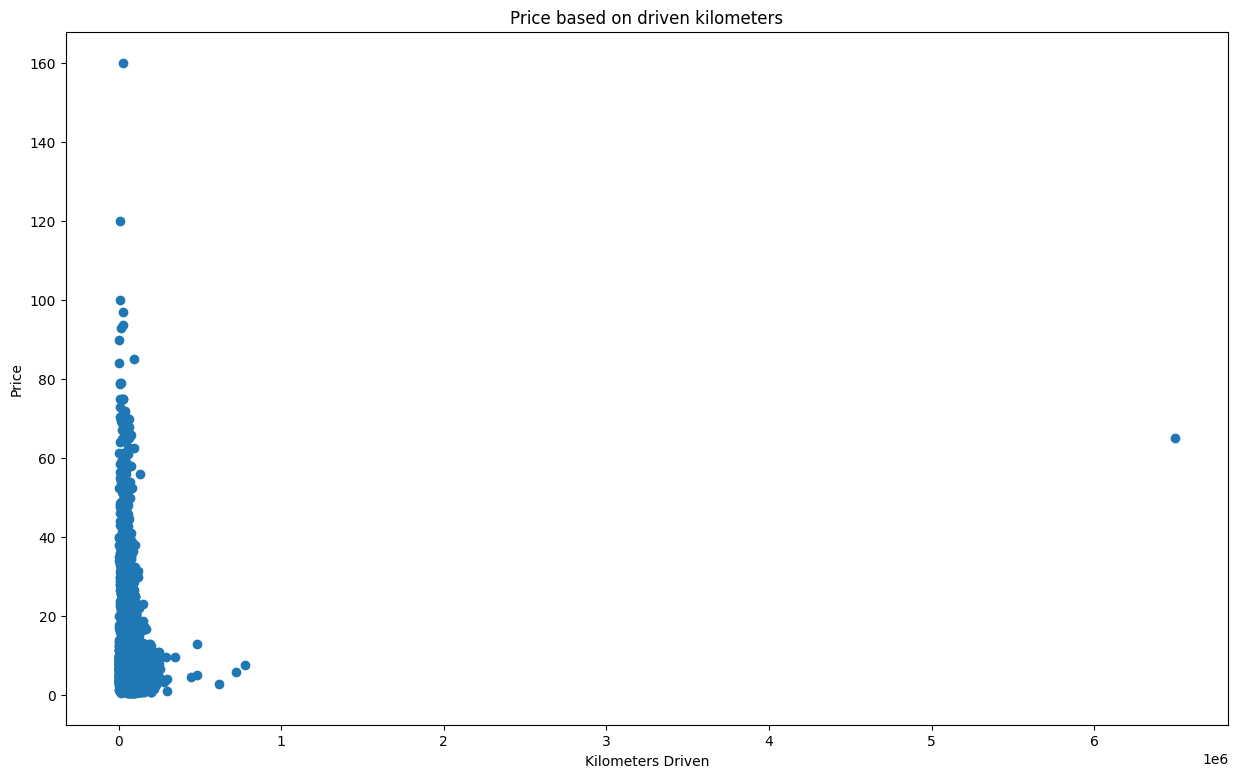

In [90]:
#Bivariate
plt.figure(figsize=(15, 9))
plt.scatter(df['Kilometers_Driven'], df['Price'])
plt.title('Price based on driven kilometers')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

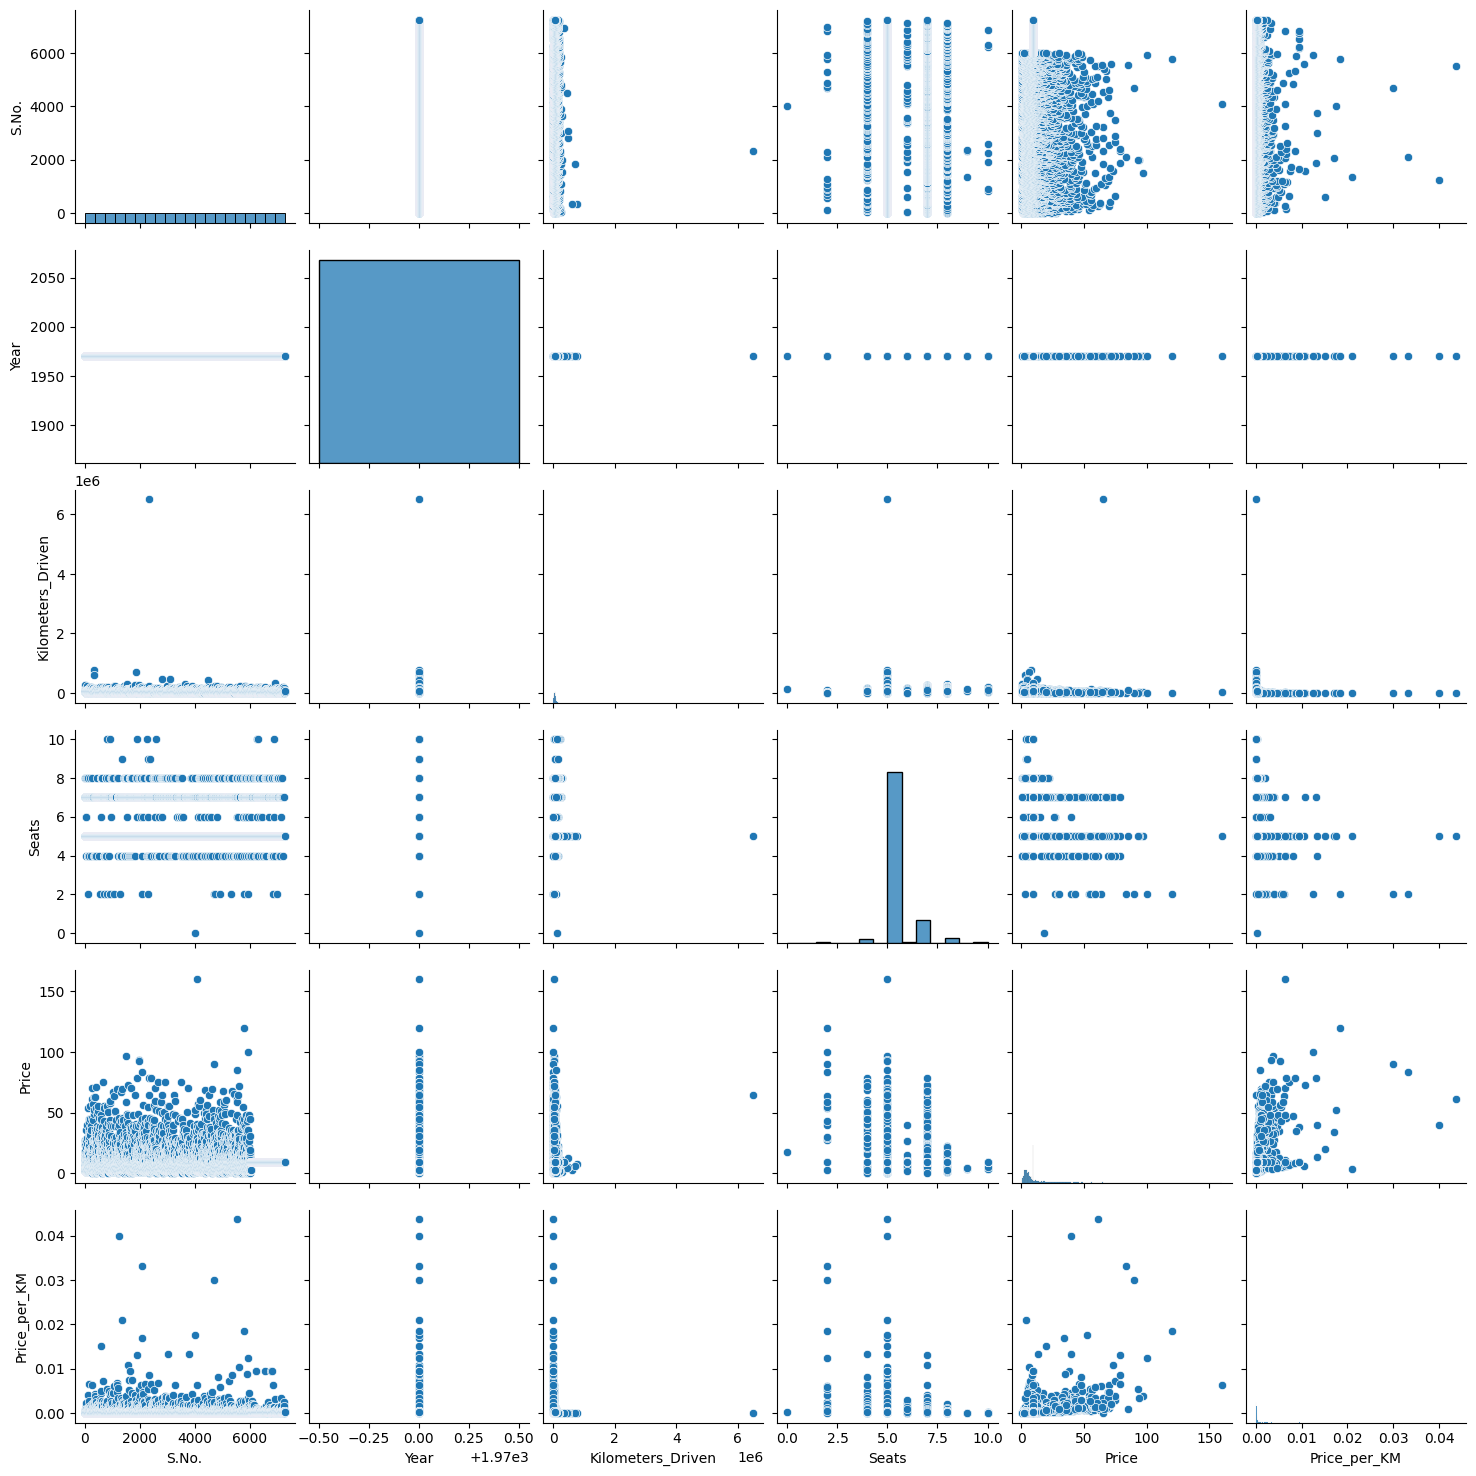

In [91]:
sns.pairplot(df)

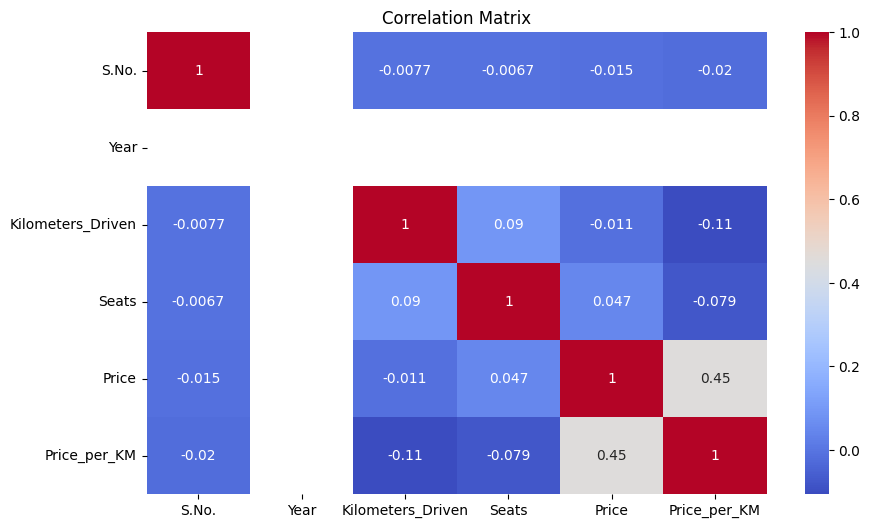

In [97]:
#Multivariate
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [93]:
#Aggregation and Grouped Analysis
# Average price by Fuel Type
print(df.groupby('Price')['Year'].mean())

Price
0.44      1970.0
0.45      1970.0
0.50      1970.0
0.51      1970.0
0.53      1970.0
           ...  
93.67     1970.0
97.07     1970.0
100.00    1970.0
120.00    1970.0
160.00    1970.0
Name: Year, Length: 1370, dtype: float64


In [94]:
# Modling the 
features = ['Kilometers_Driven', 'Engine', 'Power', "Price_per_KM"]
X = df[features].fillna(0)
y = df['Price']

In [95]:
df = pd.get_dummies(df, drop_first=True)

In [96]:
X = pd.get_dummies(X, drop_first=True)

# Convert all columns to numeric, coercing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
y = y.dropna()
X = X.loc[y.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))
print("Linear Regression R²:", r2_score(y_test, y_pred))


Linear Regression MAE: 3.0671131713011075
Linear Regression MSE: 37.279718749661285
Linear Regression R²: 0.695905685717852


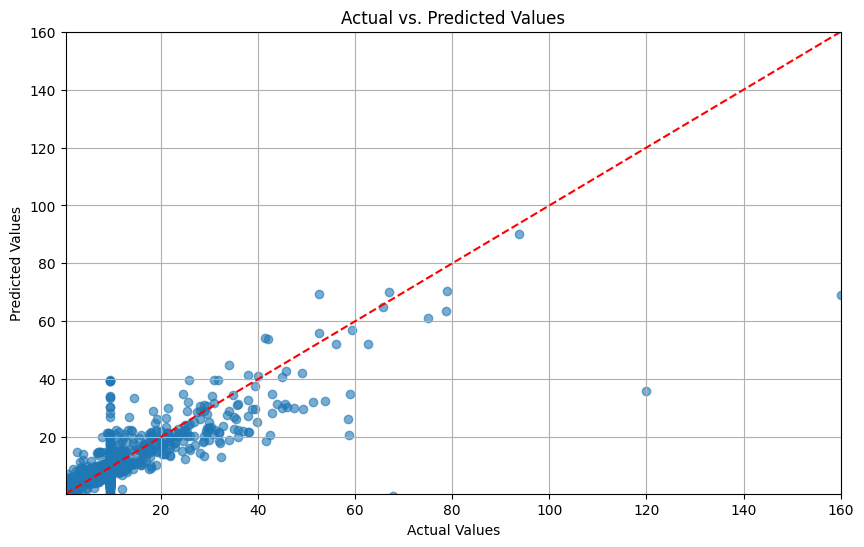

In [98]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()
plt.show()
plt.show()


In [103]:
df = df.dropna(subset=['Price'])

# Create a binary target variable 'Price_Category' based on the median price
df['Price_Category'] = (df['Price'] > df['Price'].median()).astype(int)

# Define the target variable y
y = df['Price_Category']

# Define the feature set X, excluding 'Price_Category'
X = df.drop(columns=['Price_Category'])
X = X.dropna()

# Ensure that y is aligned with X
y = y.loc[X.index]  # Align y with the indices of X

# Proceed to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Output the results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9958333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       705
           1       1.00      0.99      1.00       735

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



C:\Users\dell\anaconda3\envs\mynewnotebook\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
# Assuming df is your DataFrame and X is already defined
# Drop rows with NaN values in X
X_clean = X.dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the clusters to DataFrame
# Ensure to align with the original DataFrame by reindexing
df['Cluster'] = pd.Series(clusters, index=X_clean.index)

#  length of the new column
print("Length of Cluster column:", len(df['Cluster']))
print("Length of original DataFrame:", len(df))

Length of Cluster column: 7200
Length of original DataFrame: 7200


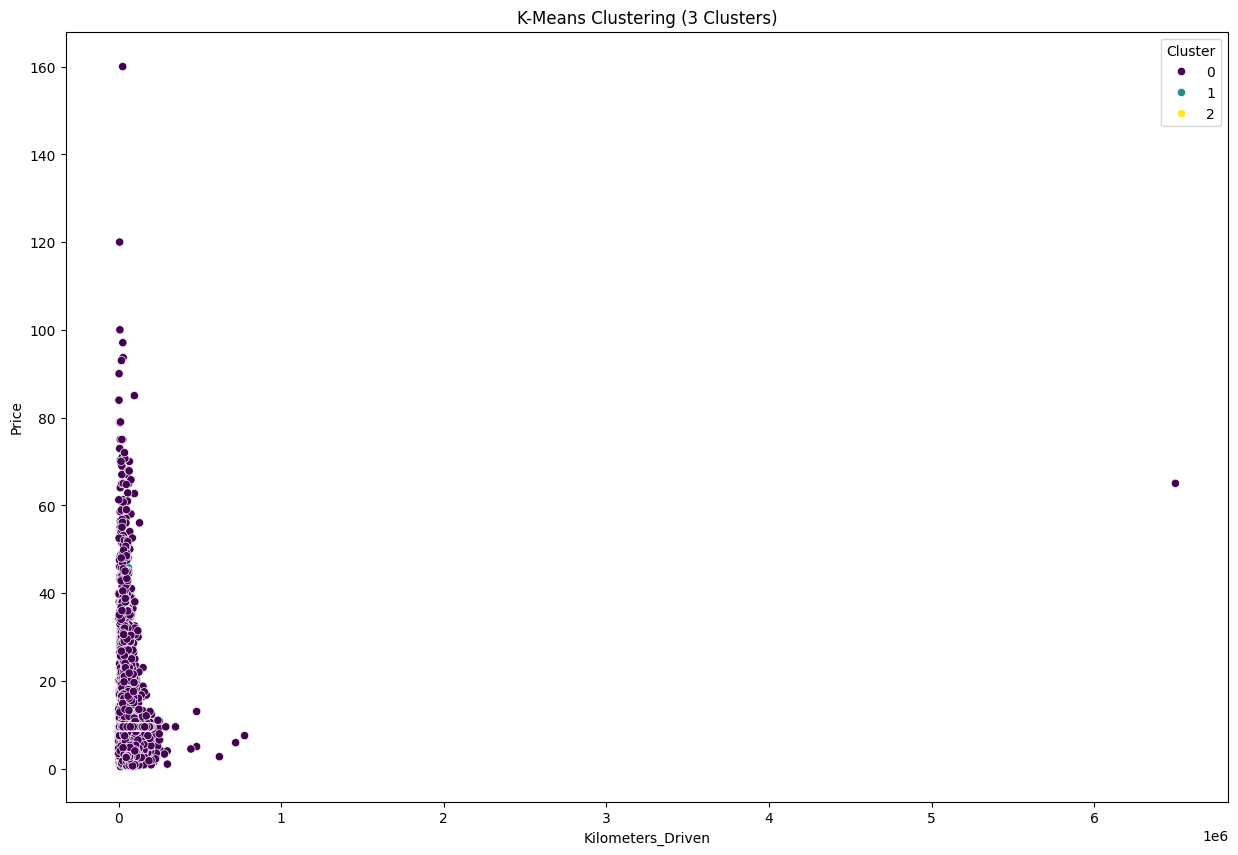

In [107]:
# Visualize
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Kilometers_Driven', y='Price', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering (3 Clusters)')
plt.show()